In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = 'heart_attack_prediction_dataset.csv'
df = pd.read_csv(file_path)

In [3]:
# Inspecting the data
print("Dataset Information:")
df.info()

print("\nFirst 5 Rows of the Dataset:")
df.head()

print("\nStatistical Summary:")
df.describe()

print("\nMissing values in the dataset:")
print(df.isnull().sum())

print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12 

In [4]:
df = df.drop('Patient ID', axis=1)

In [5]:
# Split into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Defining a function to assign numerical values to blood pressure categories
def assign_bp_category(systolic, diastolic):
    if systolic >= 180 or diastolic >= 120:
        return 4  # Hypertensive Crisis
    elif systolic >= 160 or diastolic >= 100:
        return 3  # High
    elif systolic >= 140 or diastolic >= 90:
        return 2  # Elevated
    elif systolic >= 120 or diastolic >= 80:
        return 1  # Normal High
    else:
        return 0  # Normal

# Applying the function to create a new column with numerical values
df['BP Category'] = df.apply(lambda row: assign_bp_category(row['Systolic'], row['Diastolic']), axis=1)

# Displaying the updated DataFrame
print(df)


      Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0      67    Male          208         158/88          72         0   
1      21    Male          389         165/93          98         1   
2      21  Female          324         174/99          72         1   
3      84    Male          383        163/100          73         1   
4      66    Male          318          91/88          93         1   
...   ...     ...          ...            ...         ...       ...   
8758   60    Male          121          94/76          61         1   
8759   28  Female          120        157/102          73         1   
8760   47    Male          250         161/75         105         0   
8761   36    Male          178         119/67          60         1   
8762   25  Female          356         138/67          75         1   

      Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0                  0        1        0                    0  ...   
1          

In [6]:
df = df.drop(['Blood Pressure'], axis=1)


In [9]:
dummies = pd.get_dummies(df['Sex'], dtype=int)

In [10]:
df2=pd.concat((df,dummies),axis=1)

In [11]:
df2 = df2.rename(columns={'Female': 'sex'})

In [12]:
df2 = df2.drop(['Male'], axis=1)


In [13]:
df=df2

In [14]:
df=df.drop(['Sex'],axis=1)

In [15]:
df = df.rename(columns={'sex': 'Sex'})

In [16]:
df = df.drop(columns=['Country','Continent','Hemisphere'])

In [17]:
data=df

In [18]:
df.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,BP Category,Sex
0,67,208,72,0,0,1,0,0,4.168189,Average,...,261404,31.251233,286,0,6,0,158,88,2,0
1,21,389,98,1,1,1,1,1,1.813242,Unhealthy,...,285768,27.194973,235,1,7,0,165,93,3,0
2,21,324,72,1,0,0,0,0,2.078353,Healthy,...,235282,28.176571,587,4,4,0,174,99,3,1
3,84,383,73,1,1,1,0,1,9.828130,Average,...,125640,36.464704,378,3,4,0,163,100,3,0
4,66,318,93,1,1,1,1,0,5.804299,Unhealthy,...,160555,21.809144,231,1,5,0,91,88,1,0


In [19]:
diet_mapping = {
    'Healthy': 3,
    'Average': 2,
    'Unhealthy': 1
}

# Apply the mapping
df['Diet'] = df['Diet'].map(diet_mapping)

In [20]:
categorical_value=[]
continuos_value=[]

for col in df.columns:
    if df[col].nunique()<=10:
        categorical_value.append(col)
    else:
        continuos_value.append(col)

In [21]:
categorical_value

['Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Diet',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk',
 'BP Category',
 'Sex']

In [22]:
continuos_value

['Age',
 'Cholesterol',
 'Heart Rate',
 'Exercise Hours Per Week',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Systolic',
 'Diastolic']

In [23]:
data=df
data.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,BP Category,Sex
0,67,208,72,0,0,1,0,0,4.168189,2,...,261404,31.251233,286,0,6,0,158,88,2,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,285768,27.194973,235,1,7,0,165,93,3,0
2,21,324,72,1,0,0,0,0,2.078353,3,...,235282,28.176571,587,4,4,0,174,99,3,1
3,84,383,73,1,1,1,0,1,9.828130,2,...,125640,36.464704,378,3,4,0,163,100,3,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,160555,21.809144,231,1,5,0,91,88,1,0


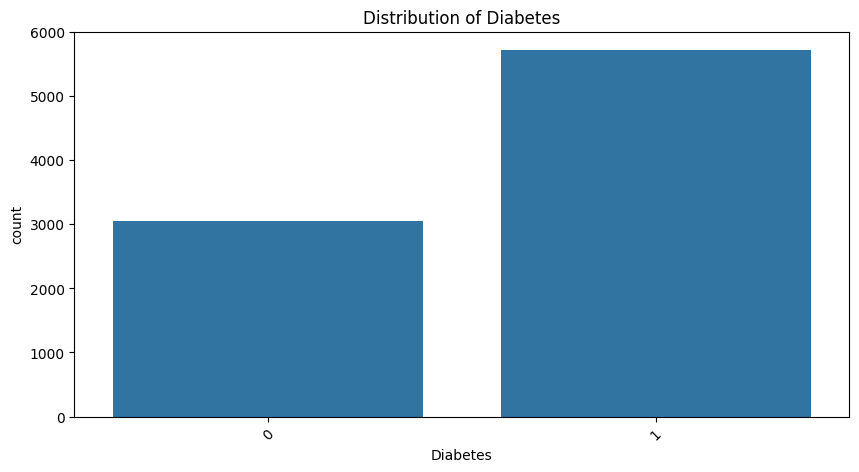

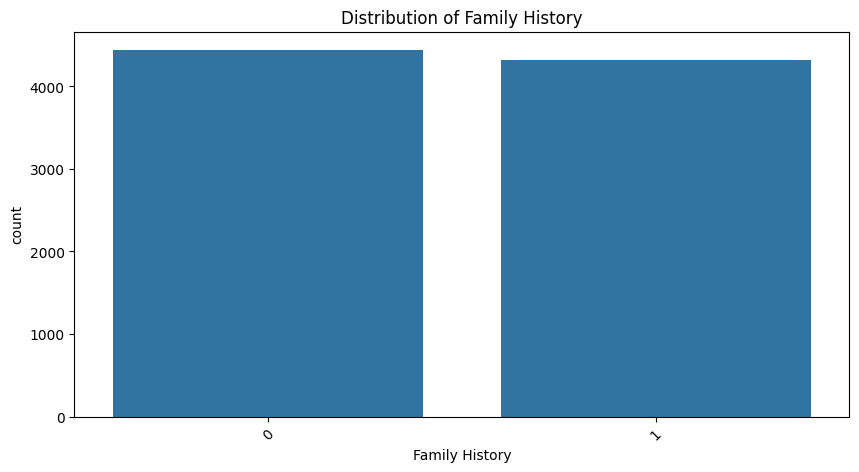

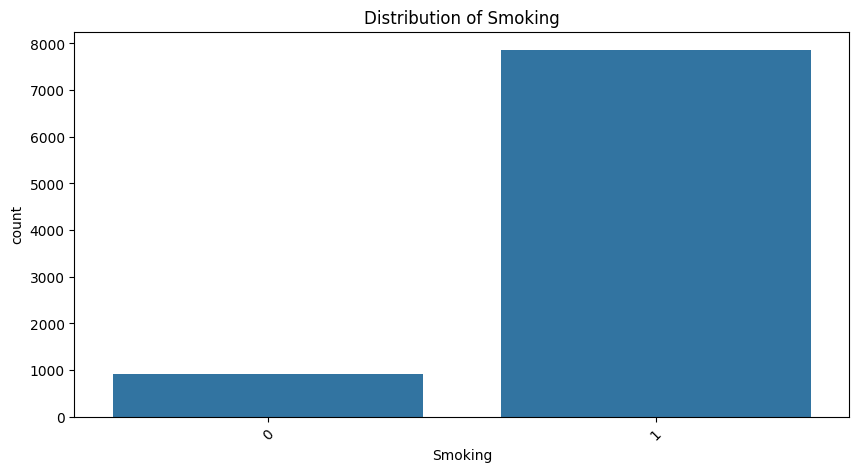

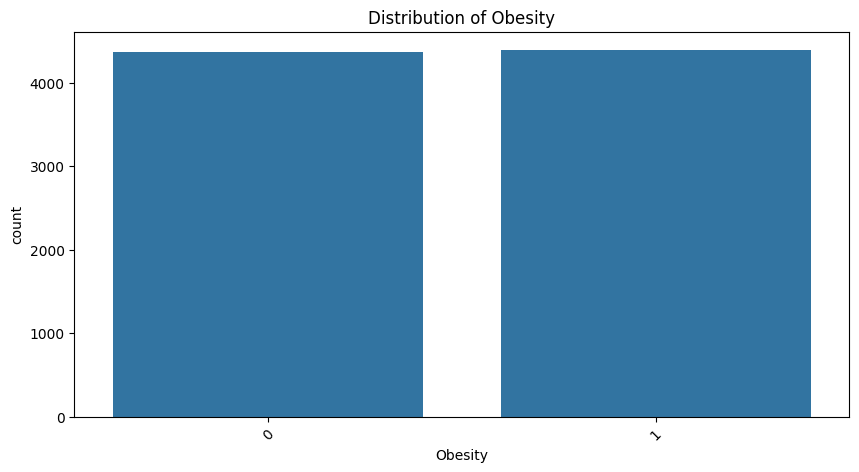

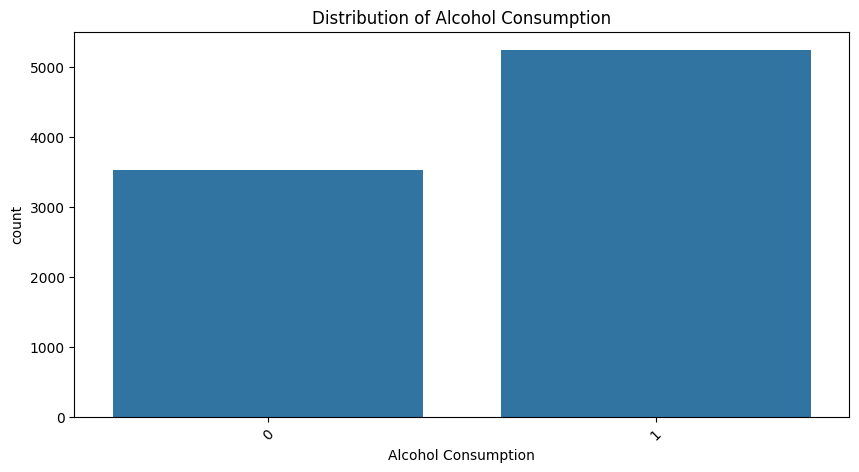

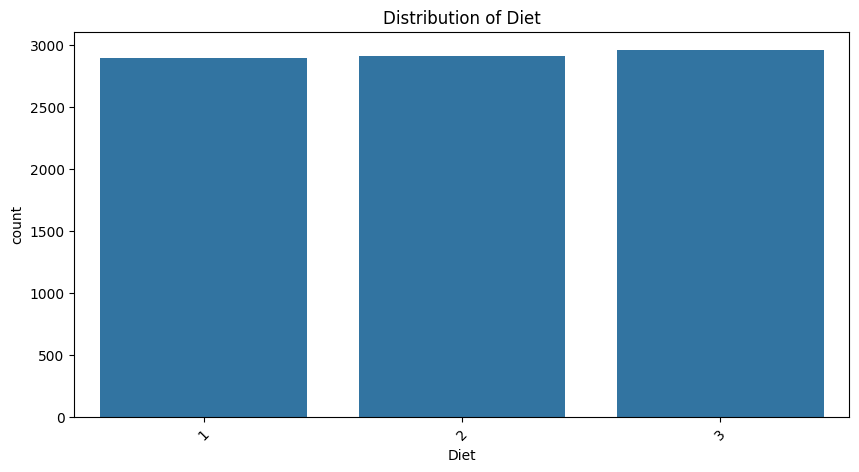

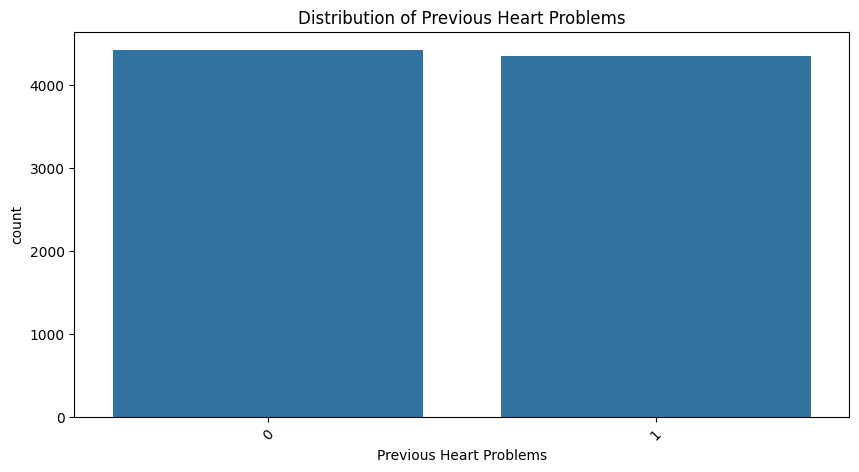

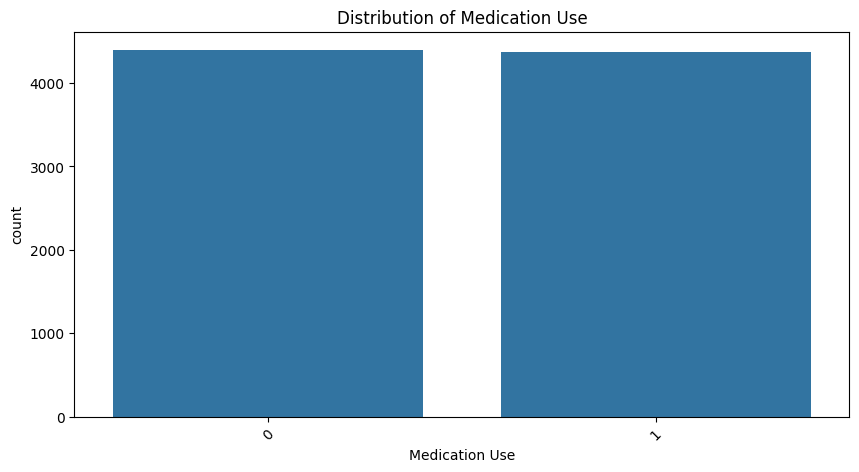

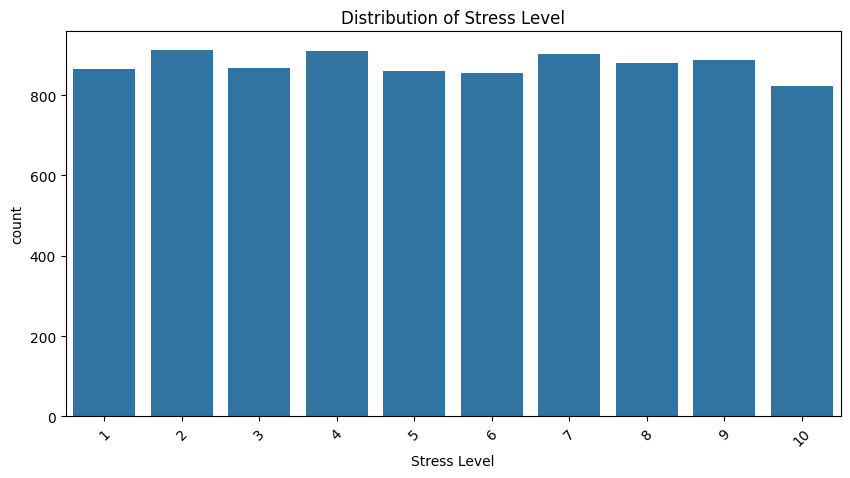

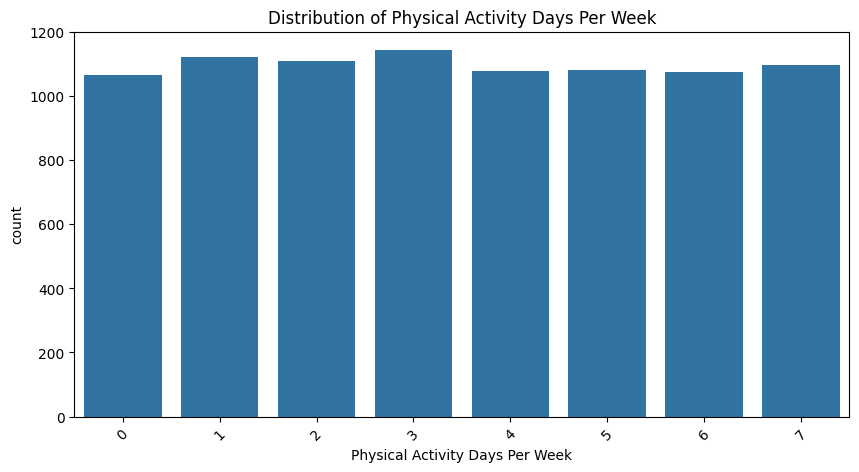

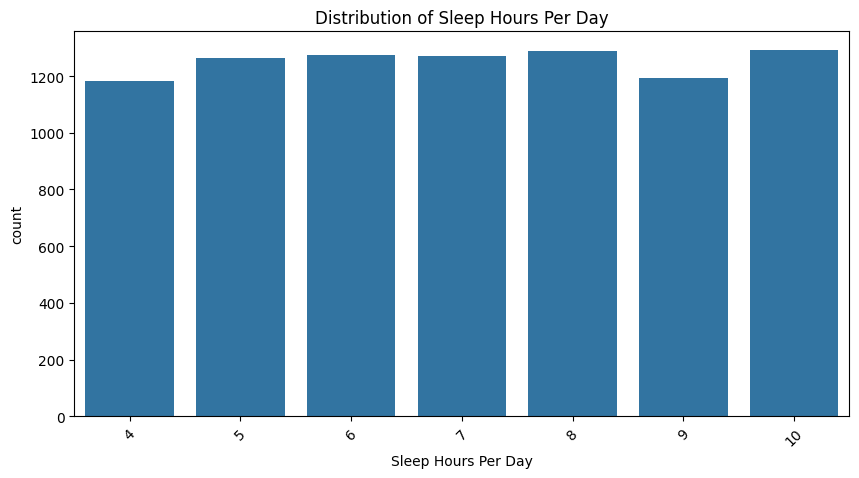

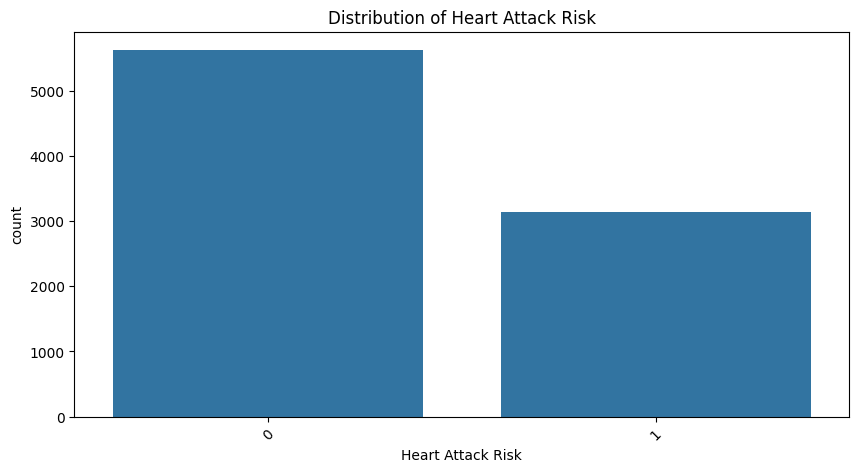

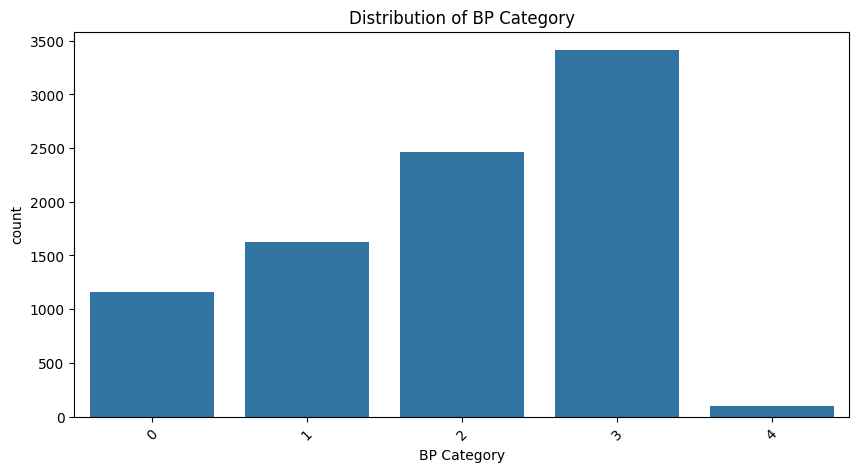

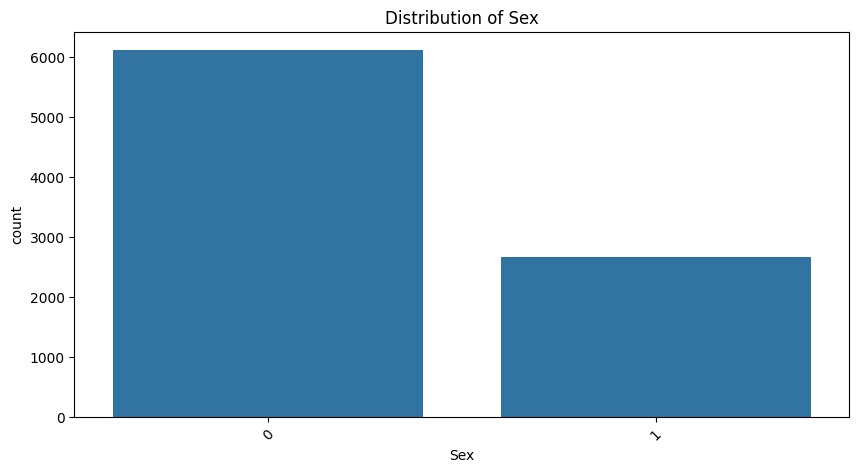

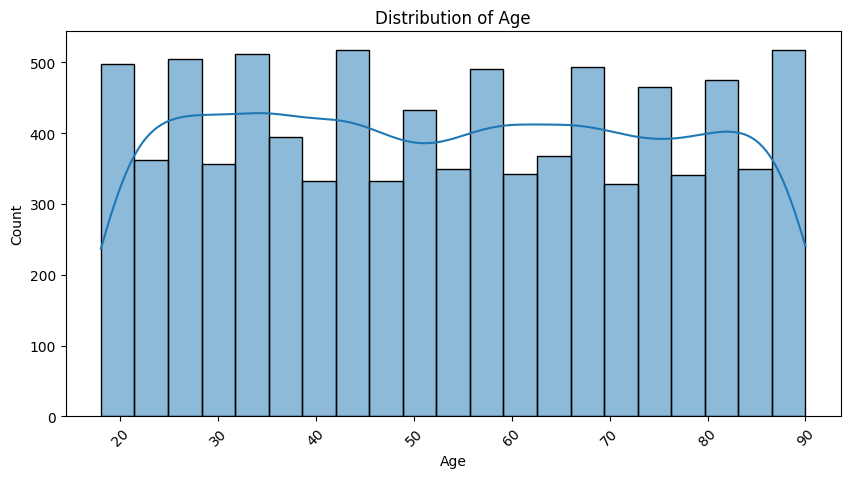

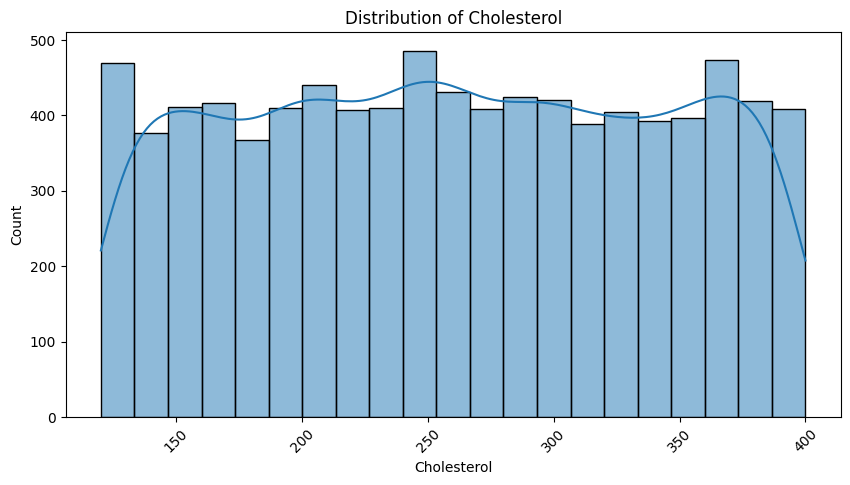

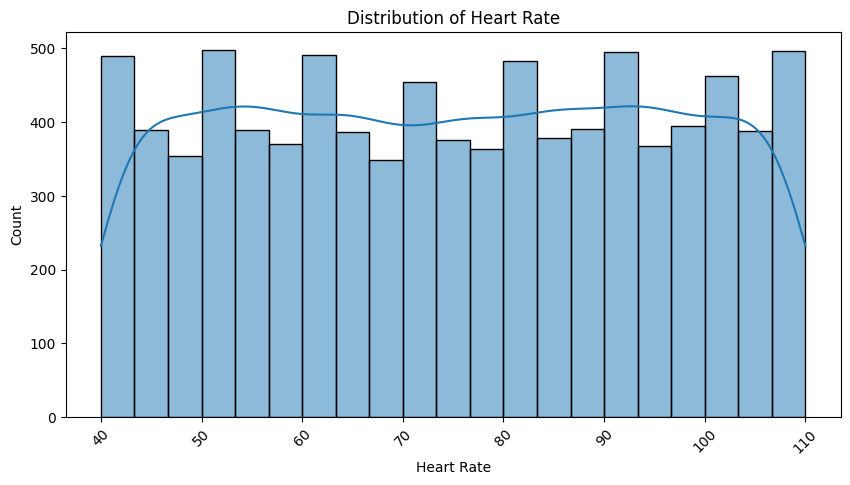

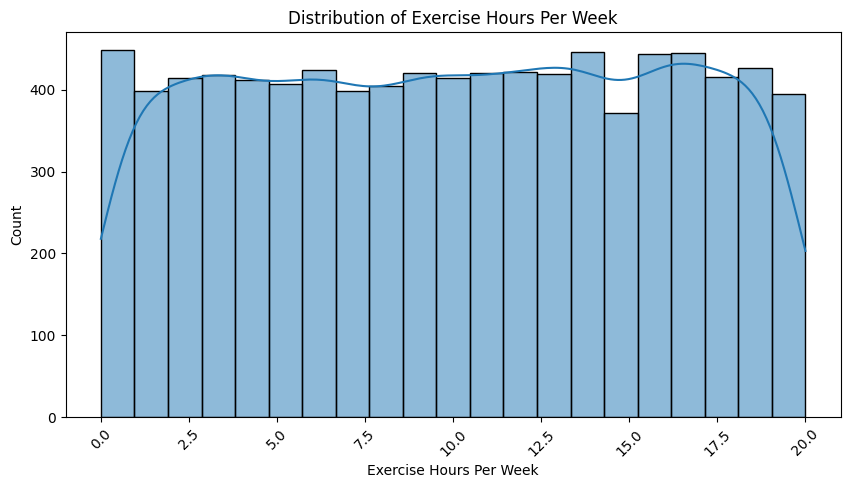

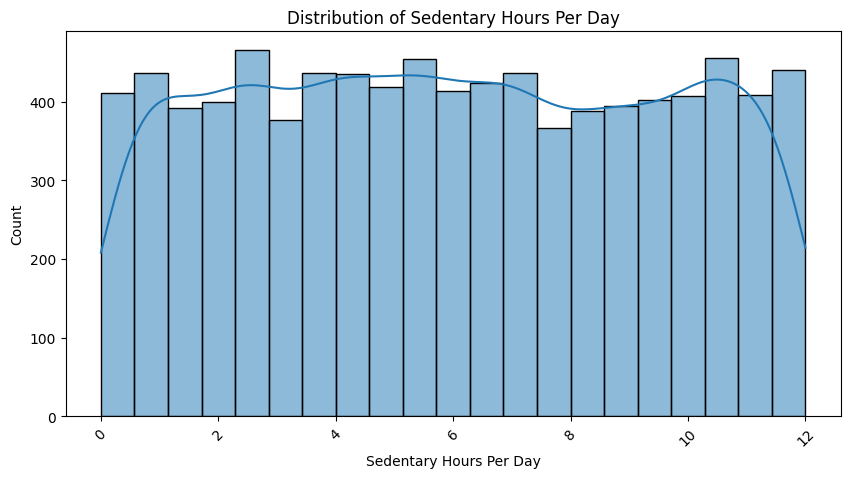

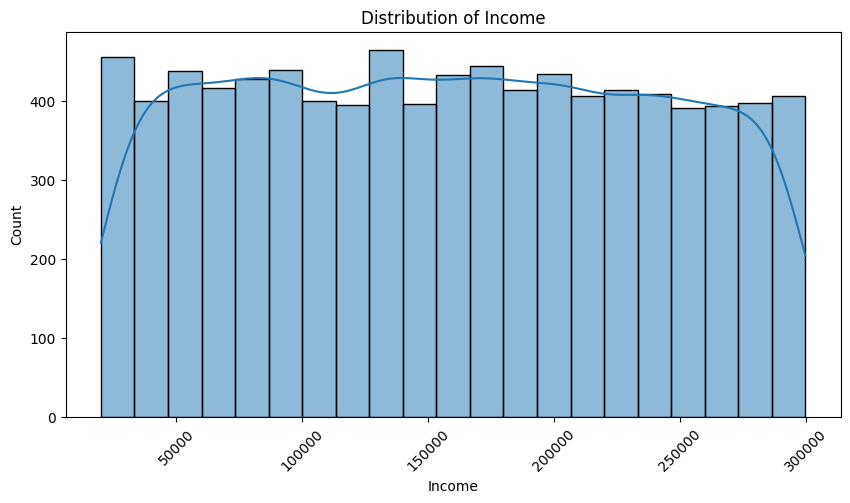

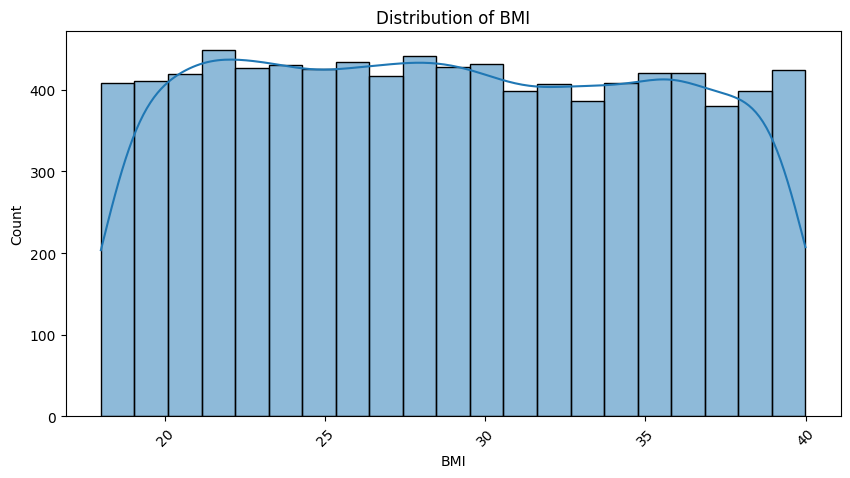

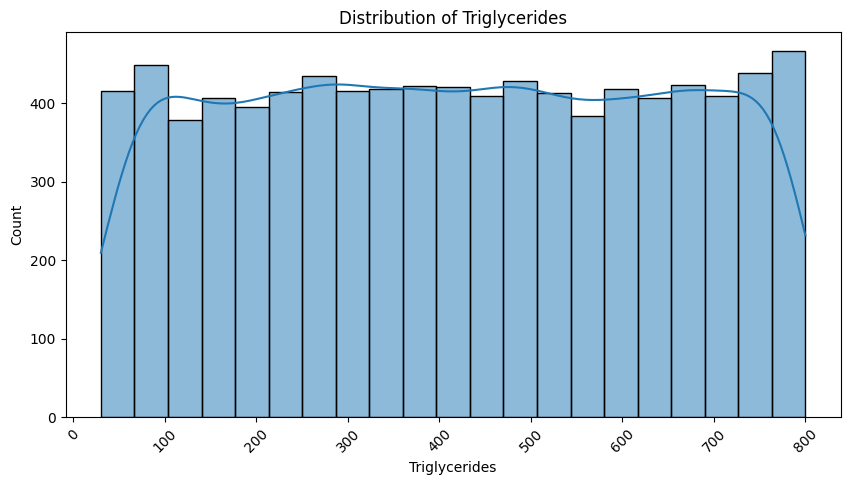

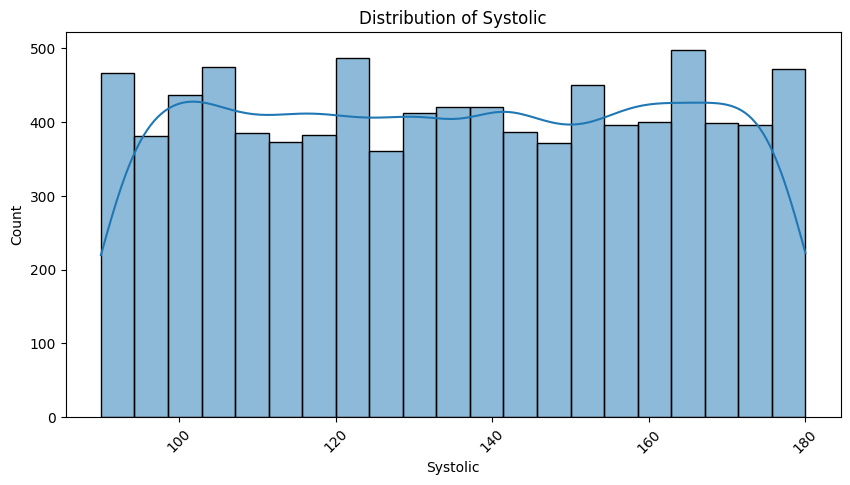

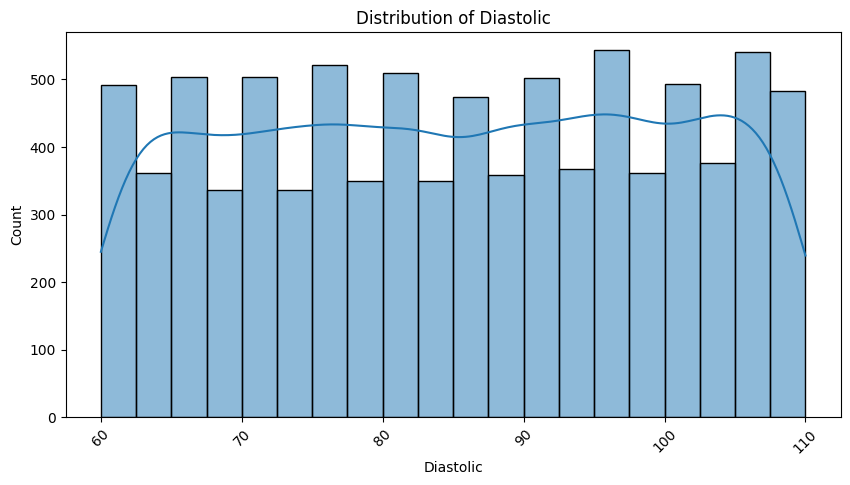

In [24]:
# Univariate Analysis - Plotting distributions of categorical and continuous variables
# Plotting categorical variables
for col in categorical_value:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Plotting continuous variables
for col in continuos_value:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


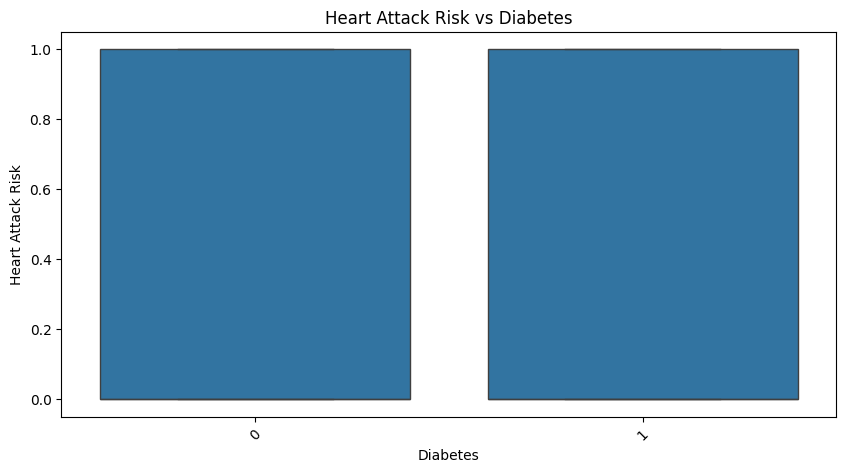

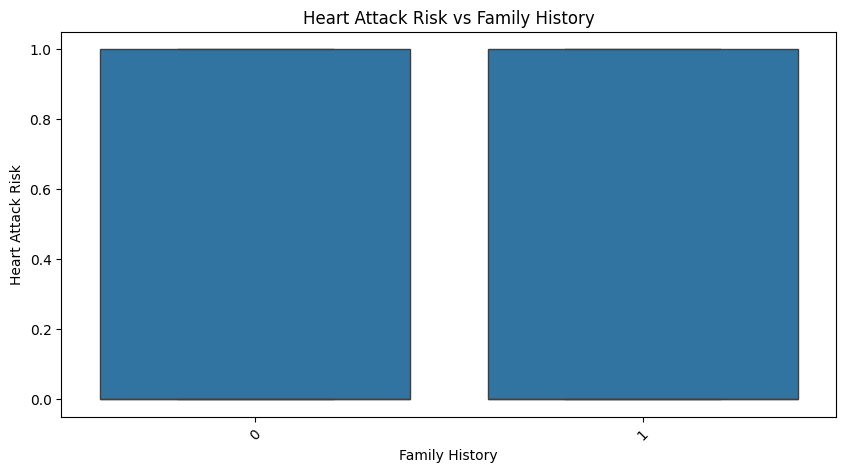

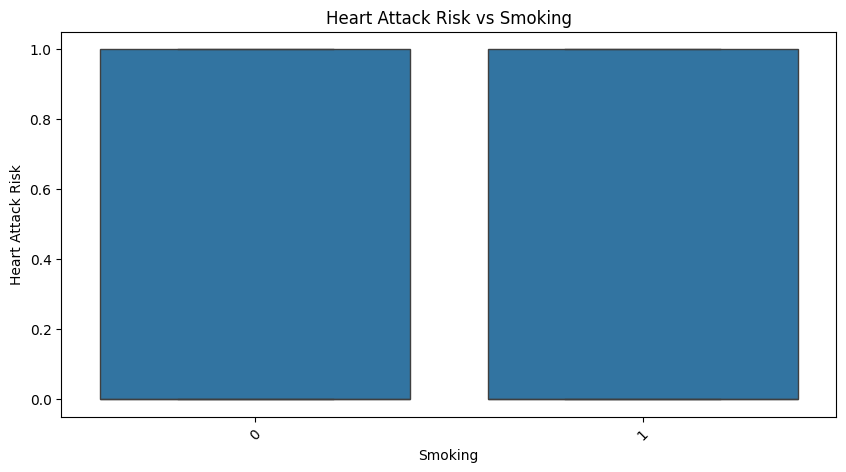

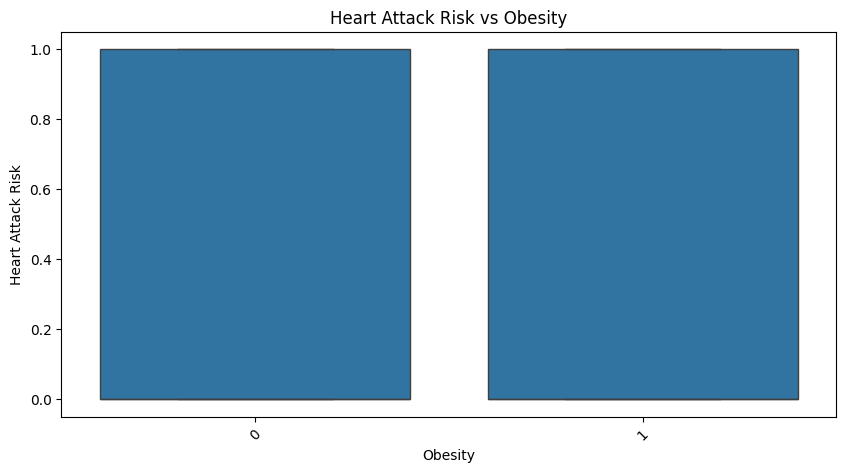

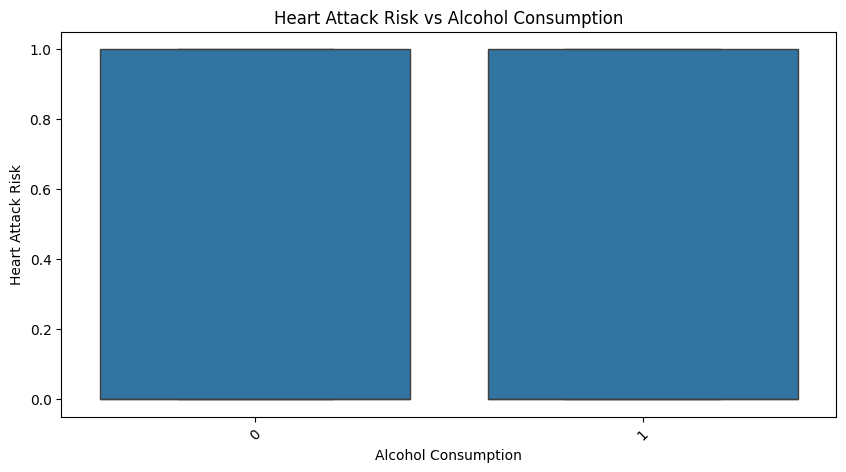

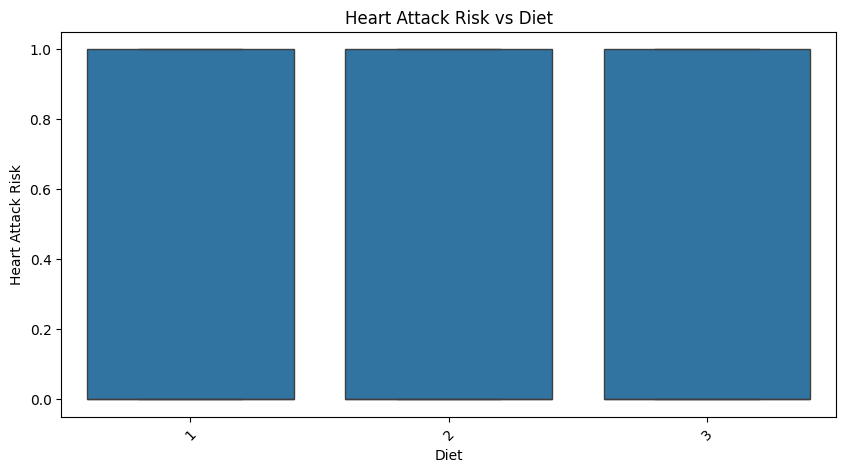

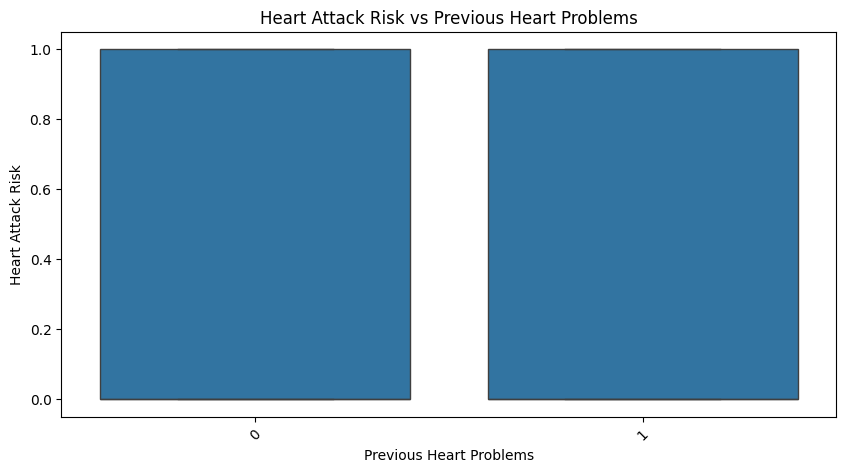

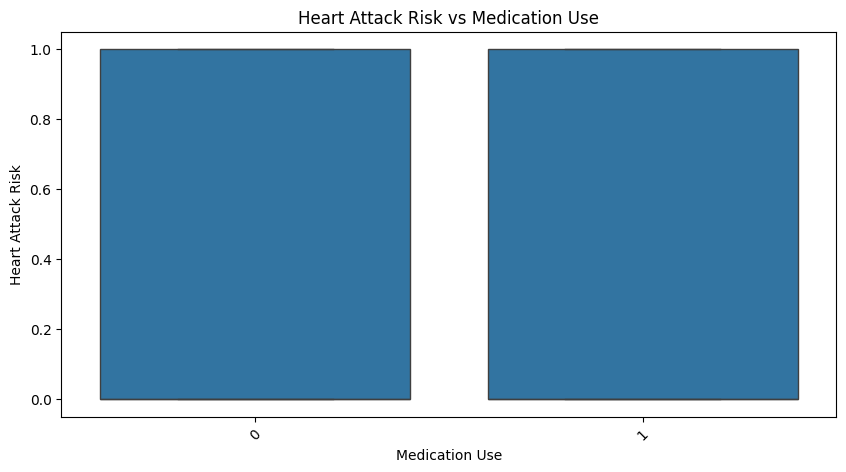

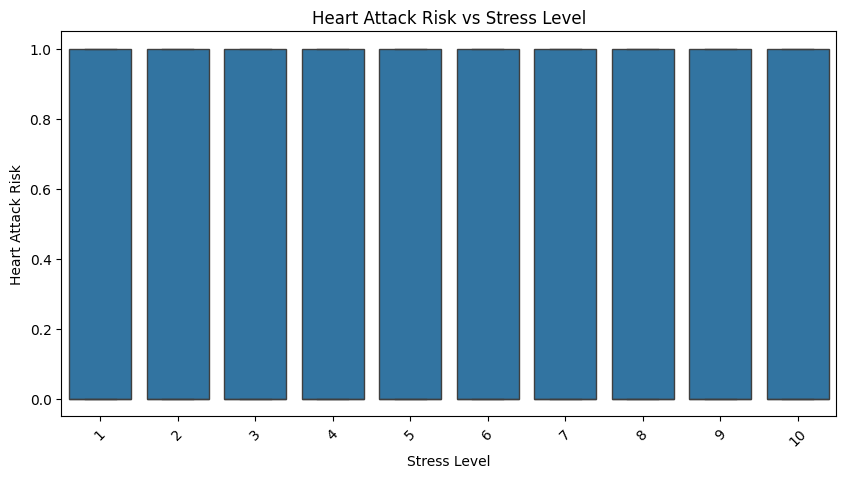

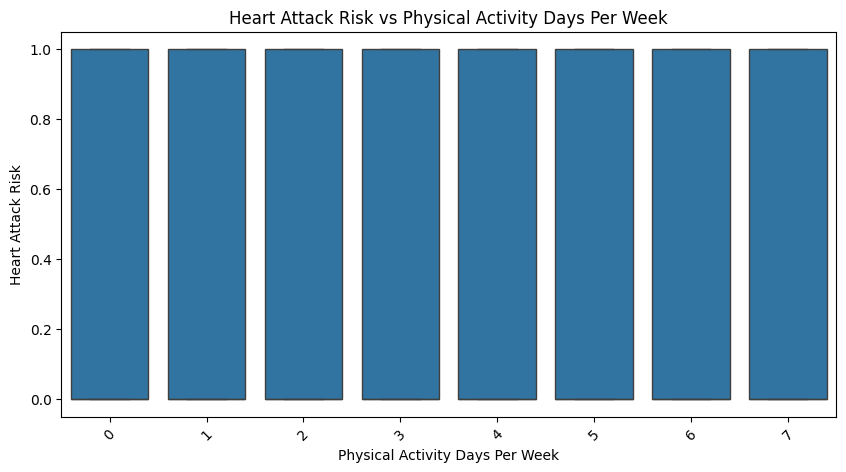

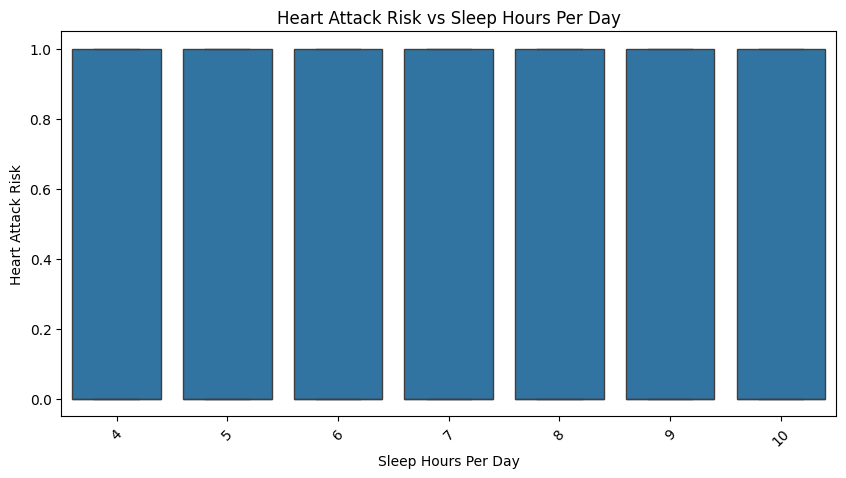

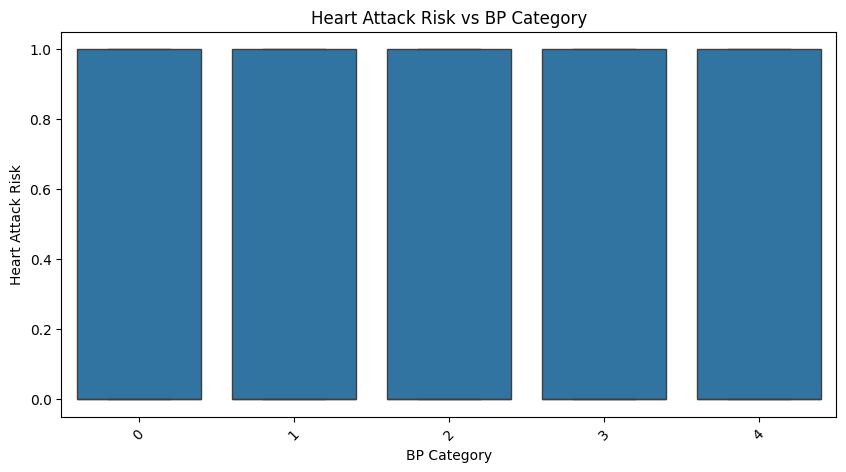

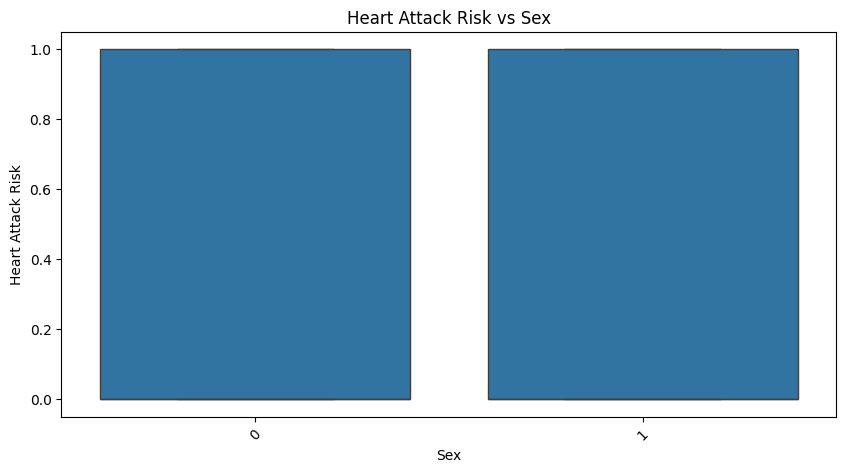

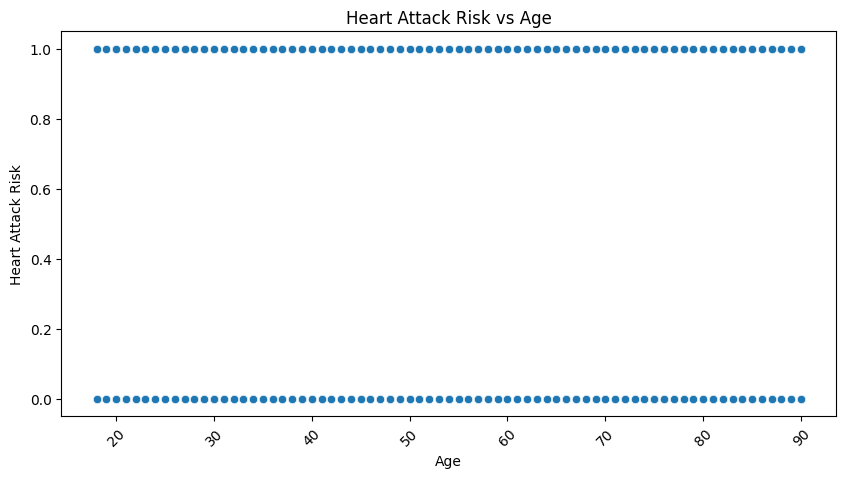

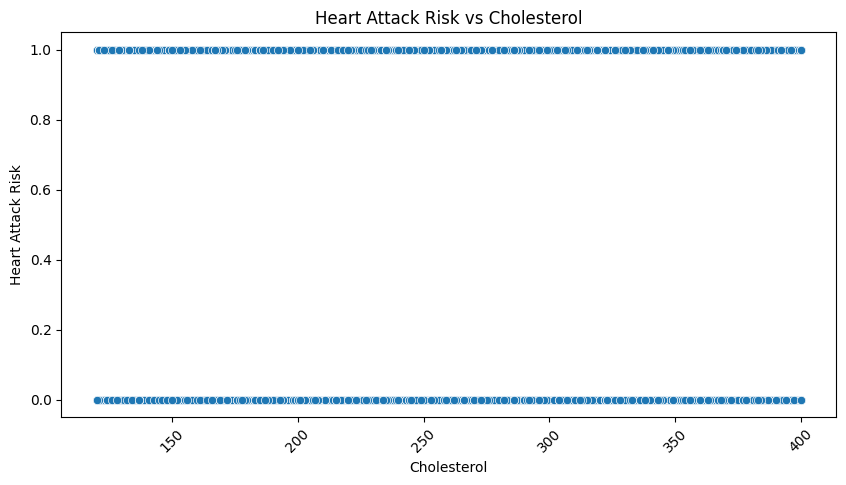

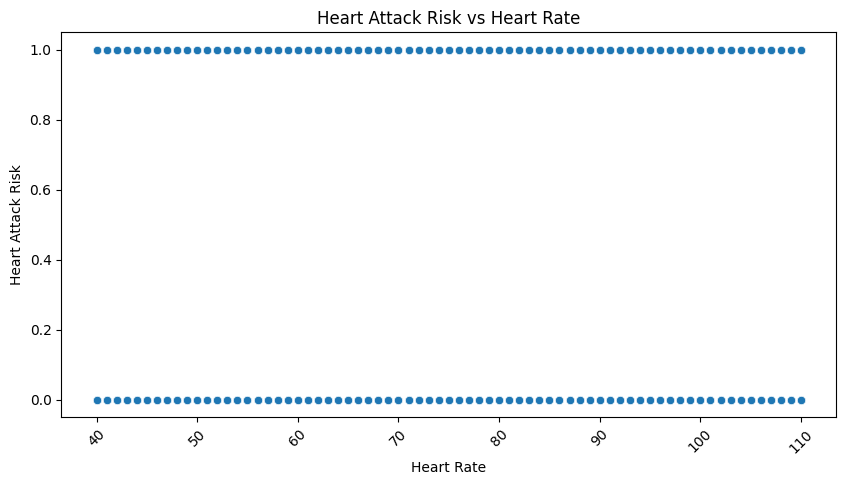

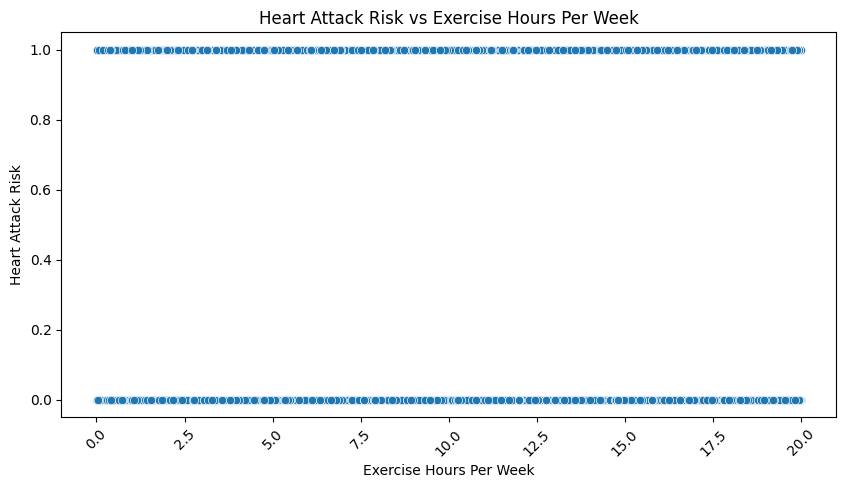

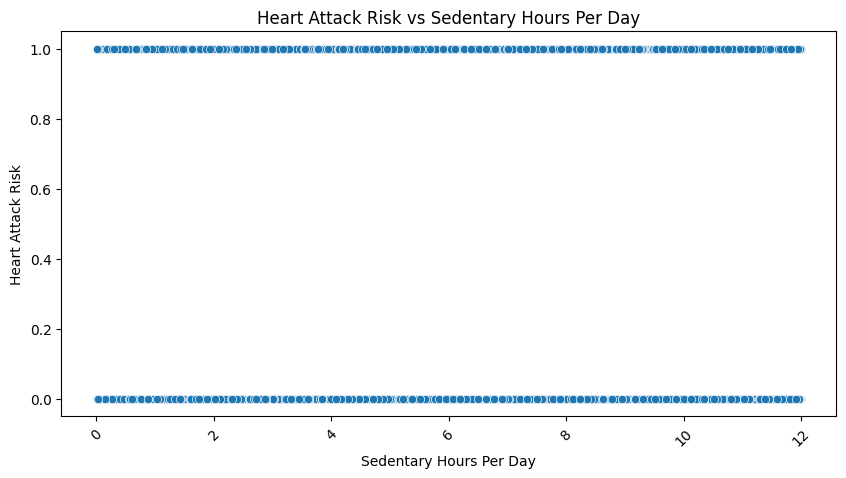

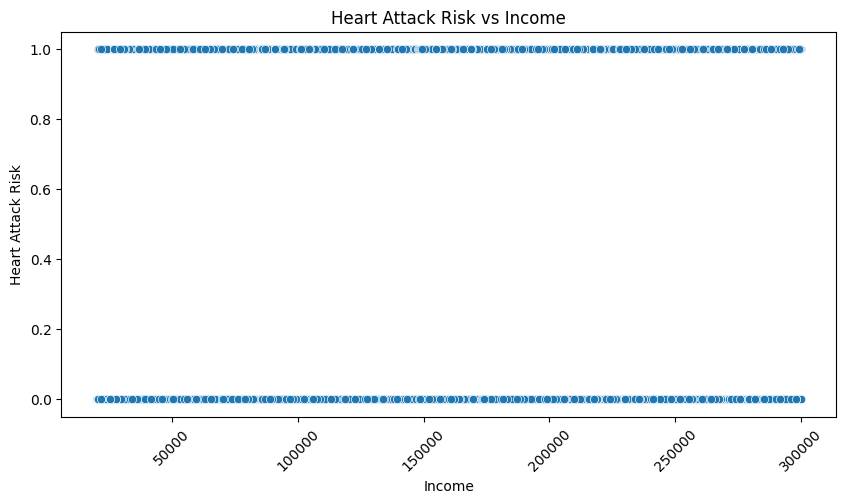

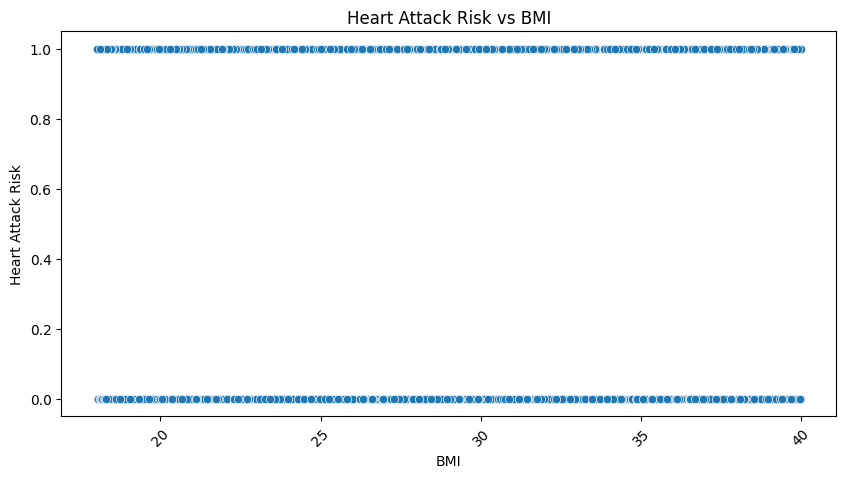

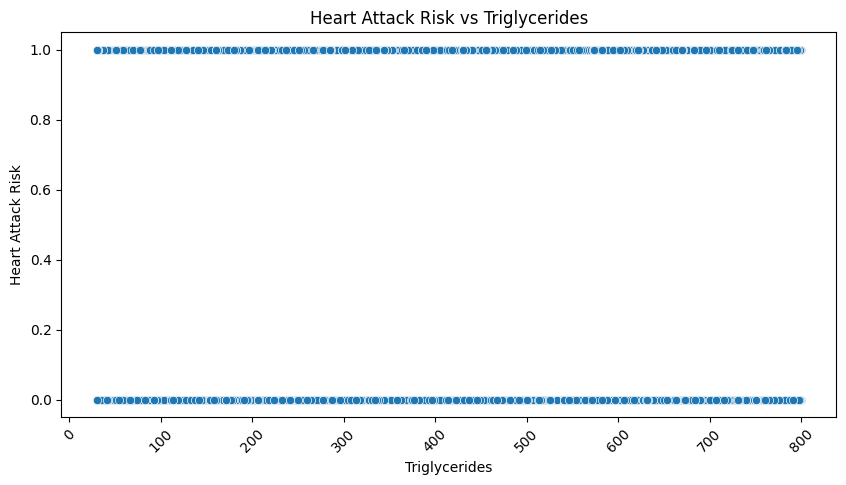

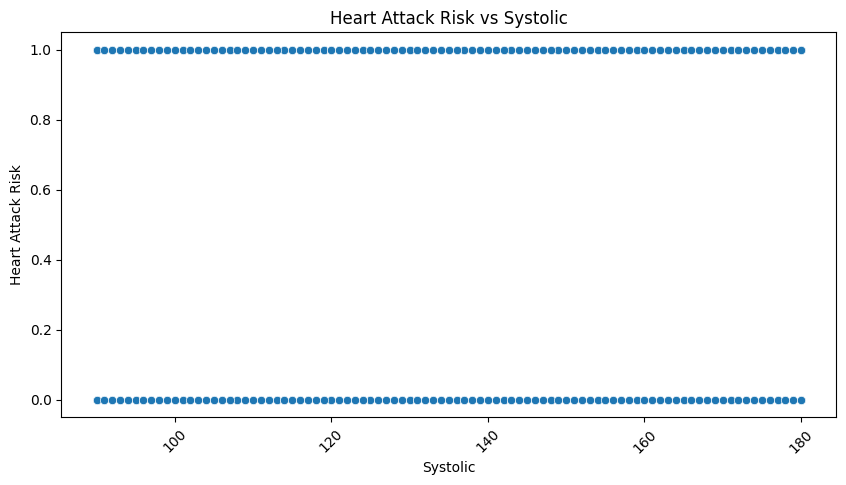

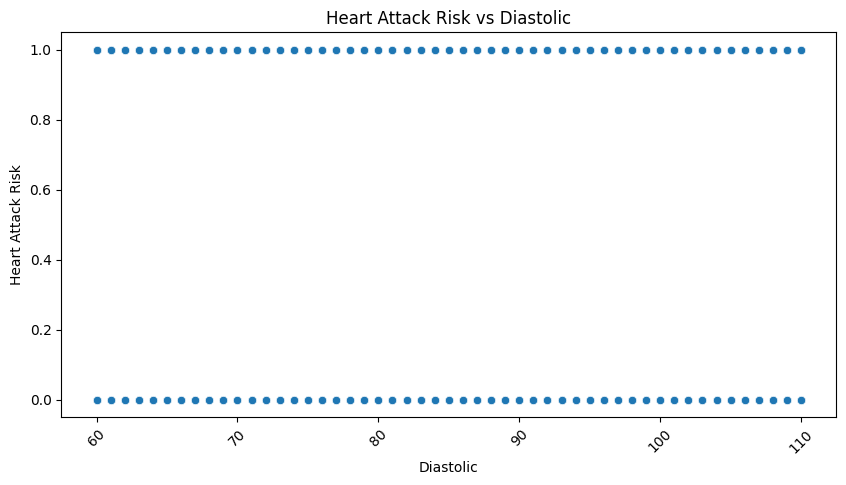

In [25]:
# Bivariate Analysis
# Categorical vs Continuous
target_variable = 'Heart Attack Risk'  

for col in categorical_value:
    if col != target_variable:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=col, y=target_variable, data=df)
        plt.title(f'{target_variable} vs {col}')
        plt.xticks(rotation=45)
        plt.show()

# Continuous vs Continuous
for col in continuos_value:
    if col != target_variable:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=col, y=target_variable, data=df)
        plt.title(f'{target_variable} vs {col}')
        plt.xticks(rotation=45)
        plt.show()


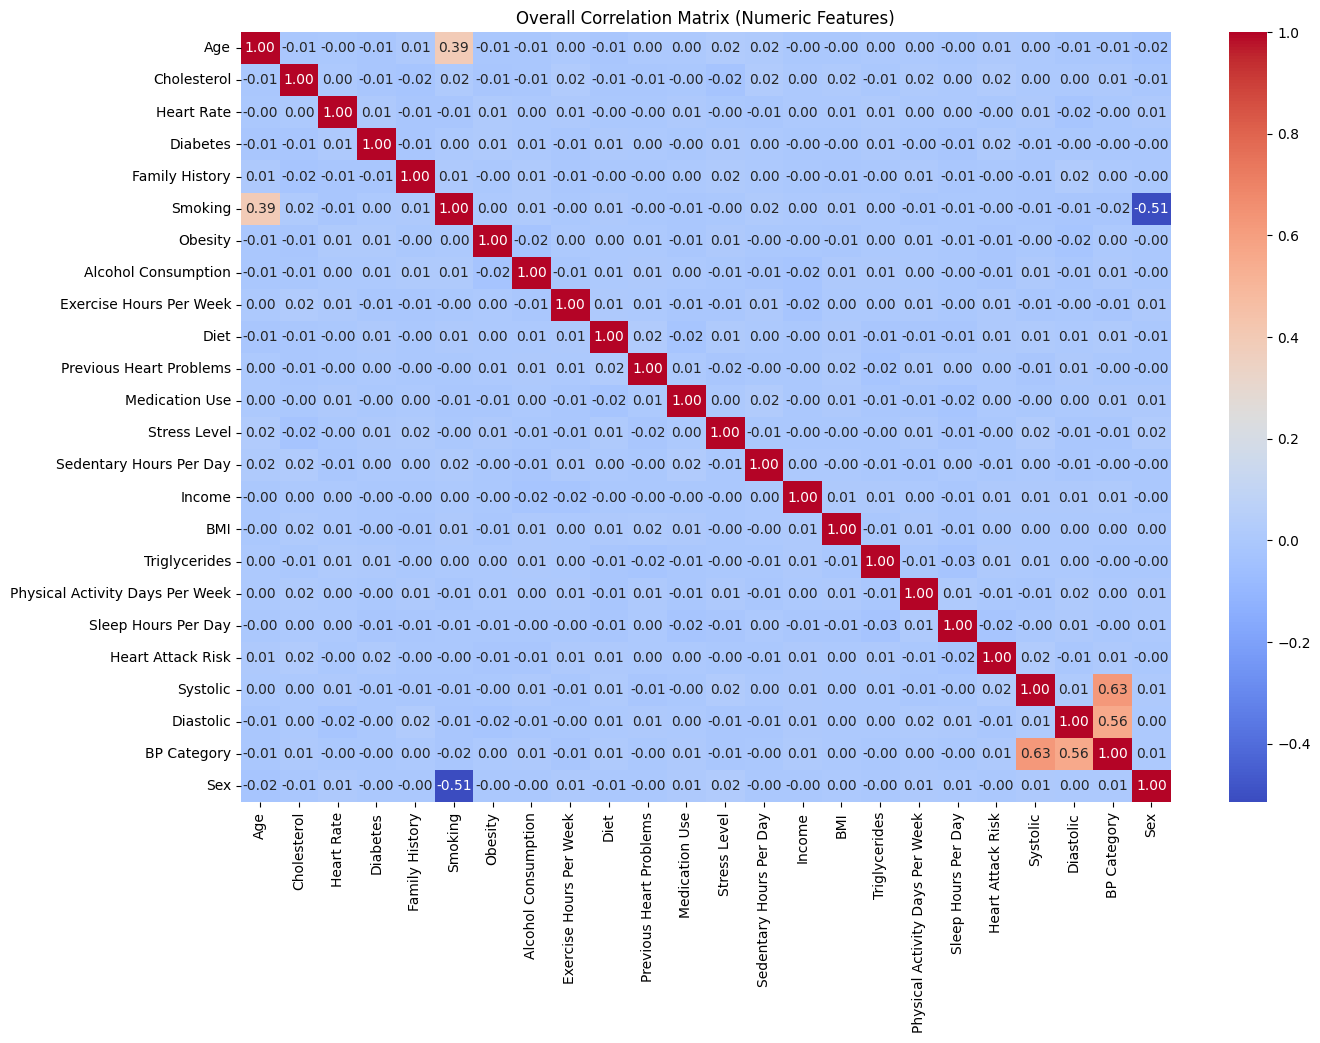

In [26]:
# Select only the numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Overall Correlation Matrix (Numeric Features)')
plt.show()


In [27]:
# Feature Scaling 
# Done Becuase Some columns very high numerical values may dominate and may hamper the accuracy of the mode to prevent it,it is done.
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

# Select only 'int64' and 'float64' columns from continuous columns
numeric_continuous_columns = df[continuos_value].select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
st = StandardScaler()

# Apply scaling to the selected numeric continuous columns
df[numeric_continuous_columns] = st.fit_transform(df[numeric_continuous_columns])


In [29]:
# Splitting the dataset into the training and the test dataset 

#dependent variable 

X=df.drop('Heart Attack Risk',axis=1)

In [30]:
y=df['Heart Attack Risk']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
X_train

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,BP Category,Sex
5967,1.425621,-0.530274,-0.001055,1,1,1,1,1,1.226413,2,...,-1.227947,-0.057654,0.996137,0.564609,3,6,-0.382400,-0.146917,1,0
8270,1.613872,-0.629212,1.410153,1,0,1,0,1,-1.238470,1,...,1.697324,-0.416656,0.332365,1.033913,2,4,-0.154683,-0.896454,1,0
100,1.707997,-0.443703,1.118179,1,0,1,0,1,-1.115834,2,...,1.045829,-0.041742,-0.955819,-0.727096,4,5,1.097762,-1.373432,3,0
3410,-1.256947,1.436121,-0.487678,0,0,1,0,1,1.559771,2,...,-1.161281,-0.085952,1.364492,1.690939,1,4,0.224846,-1.032733,2,0
1790,0.060806,0.125191,0.923529,0,1,1,1,1,-1.564130,2,...,0.363139,-0.957374,-0.889787,0.144470,2,4,0.414610,-0.283196,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.268632,0.916696,-1.558250,1,0,1,1,0,0.935292,1,...,-1.125770,-1.221354,0.737233,0.586957,4,4,-1.558939,-0.215057,1,0
5191,0.672620,-0.888924,-0.293029,0,0,1,0,1,0.289651,1,...,-1.462881,-1.215471,-0.434980,-0.034313,2,9,-0.723976,-1.032733,0,1
5390,-1.021634,-1.123902,0.436906,1,0,0,1,0,0.281003,1,...,-0.076033,-1.125214,1.680886,1.606018,4,9,0.794139,-0.419476,2,1
860,1.472684,0.310700,-1.022964,1,1,1,1,1,0.182709,1,...,0.579353,-0.239333,-0.536800,0.600365,1,10,1.135714,-0.828314,3,1


In [34]:
y_train

5967    0
8270    1
100     0
3410    0
1790    0
       ..
5734    0
5191    0
5390    1
860     0
7270    0
Name: Heart Attack Risk, Length: 7010, dtype: int64

In [35]:
X_test

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Systolic,Diastolic,BP Category,Sex
1226,0.531432,0.990899,-0.001055,0,0,1,1,1,-0.024812,3,...,-0.122997,0.724840,1.055551,-0.458922,0,4,-0.420353,-1.169013,1,0
7903,1.096183,1.250612,-1.412263,1,0,1,0,0,-1.253748,3,...,1.145629,0.788313,-0.356512,0.238330,3,6,1.591149,1.284017,3,0
1559,0.766745,1.003267,-0.098380,1,1,1,1,1,1.091255,3,...,0.911118,0.492994,-0.785535,-1.402000,1,8,0.794139,-0.078777,2,0
3621,-0.315695,1.633997,-0.147042,0,1,1,1,0,-0.839010,2,...,0.704371,-0.865045,0.093288,-0.968452,6,9,0.756186,-0.692035,2,0
7552,0.437307,-1.074433,1.118179,0,0,1,0,1,-1.094995,1,...,0.821625,-0.121957,-1.231464,0.984748,2,7,-1.217363,1.624716,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,1.190308,-1.705163,0.144932,0,0,1,0,1,0.678841,2,...,-0.583219,-1.445691,-1.550163,-1.281322,0,6,-0.610117,-1.373432,0,1
4375,1.190308,-0.183990,-1.363600,1,0,1,0,1,-0.458191,3,...,-0.704721,0.776038,-1.299687,0.072956,0,8,-0.686023,1.011458,3,1
5403,1.707997,-1.012597,-0.730990,0,0,1,0,0,-0.929390,1,...,0.415015,0.574227,0.709107,-0.034313,3,5,-0.154683,-0.487615,1,0
6735,0.107869,-0.789986,0.485568,1,1,1,1,1,-0.483113,1,...,-1.517141,-1.021690,-0.639487,-1.093600,2,9,1.553196,1.624716,3,0


In [36]:
y_test

1226    0
7903    1
1559    1
3621    1
7552    0
       ..
5623    1
4375    1
5403    0
6735    0
2215    0
Name: Heart Attack Risk, Length: 1753, dtype: int64

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 

In [38]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1=log.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred1)

0.6417569880205363

In [42]:
#SVC (Support Vector Classifier)



In [43]:
from sklearn import svm

In [44]:
svm=svm.SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred2=svm.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred2)

0.6417569880205363

In [48]:
#KNeighbours Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred3=knn.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)

0.576155162578437

In [54]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [55]:
score

[0.5385054192812322,
 0.5949800342270394,
 0.5482030804335425,
 0.5949800342270394,
 0.576155162578437,
 0.5995436394751854,
 0.576155162578437,
 0.6052481460353679,
 0.580718767826583,
 0.602966343411295,
 0.5847119224187107,
 0.6115231032515688,
 0.5898459783228751,
 0.6115231032515688,
 0.5966913861950941,
 0.6149458071876782,
 0.6063890473474044,
 0.6229321163719338,
 0.6206503137478608,
 0.6326297775242442,
 0.6195094124358242,
 0.6280661722760981,
 0.6252139189960069,
 0.6303479749001711,
 0.6297775242441529,
 0.6326297775242442,
 0.6286366229321164,
 0.6337706788362807,
 0.6297775242441529,
 0.6337706788362807,
 0.6309184255561894,
 0.6377638334284085,
 0.6303479749001711,
 0.6326297775242442,
 0.6286366229321164,
 0.6337706788362807,
 0.6263548203080433,
 0.6366229321163719,
 0.6309184255561894]

In [56]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.6377638334284085

In [58]:
d=pd.read_csv('heart_attack_prediction_dataset.csv')

In [59]:
d = d.drop('Patient ID', axis=1)
d[['Systolic', 'Diastolic']] = d['Blood Pressure'].str.split('/', expand=True)
d['Systolic'] = d['Systolic'].astype(int)
d['Diastolic'] = d['Diastolic'].astype(int)

# Defining a function to assign numerical values to blood pressure categories
def assign_bp_category(systolic, diastolic):
    if systolic >= 180 or diastolic >= 120:
        return 4  # Hypertensive Crisis
    elif systolic >= 160 or diastolic >= 100:
        return 3  # High
    elif systolic >= 140 or diastolic >= 90:
        return 2  # Elevated
    elif systolic >= 120 or diastolic >= 80:
        return 1  # Normal High
    else:
        return 0  # Normal

# Applying the function to create a new column with numerical values
d['BP Category'] = d.apply(lambda row: assign_bp_category(row['Systolic'], row['Diastolic']), axis=1)

d = d.drop(['Blood Pressure'], axis=1)


In [61]:
dummy = pd.get_dummies(d['Sex'], dtype=int)
df3=pd.concat((d,dummies),axis=1)
df3 = df3.rename(columns={'Female': 'sex'})
df3 = df3.drop(['Male'], axis=1)
d=df3
d=d.drop(['Sex'],axis=1)
d = d.rename(columns={'sex': 'Sex'})
d = d.drop(columns=['Country','Continent','Hemisphere'])
diet_mappin = {
    'Healthy': 3,
    'Average': 2,
    'Unhealthy': 1
}

# Apply the mapping
d['Diet'] = d['Diet'].map(diet_mappin)

In [62]:
d.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic,BP Category,Sex
0,67,208,72,0,0,1,0,0,4.168189,2,...,261404,31.251233,286,0,6,0,158,88,2,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,285768,27.194973,235,1,7,0,165,93,3,0
2,21,324,72,1,0,0,0,0,2.078353,3,...,235282,28.176571,587,4,4,0,174,99,3,1
3,84,383,73,1,1,1,0,1,9.828130,2,...,125640,36.464704,378,3,4,0,163,100,3,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,160555,21.809144,231,1,5,0,91,88,1,0


In [96]:
X=d.drop('Heart Attack Risk',axis=1)
y=d['Heart Attack Risk']

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
#Decision Tree Classifier


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt=DecisionTreeClassifier()

In [100]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
Y_pred4=dt.predict(x_test)

In [102]:
accuracy_score(Y_test,Y_pred4)

0.5333713633770679

In [103]:
# Random Forest Classifier 

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf=RandomForestClassifier

In [106]:
X_train = pd.get_dummies(X_train)  # For categorical variables


In [107]:
print(type(X_train), type(y_train))
print(X_train.dtypes)  # If x_train is a DataFrame


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                 int64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Systolic                             int64
Diastolic                            int64
BP Category            

In [85]:
X_train = pd.get_dummies(X_train)  # For categorical variables


In [108]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(7010, 23)
(7010,)


In [109]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


In [110]:
y_pre5 = rf.predict(x_test)


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [111]:
# Gradient Boosting Classifier

In [112]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbc=GradientBoostingClassifier()

In [114]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [94]:
y_pred6=gbc.predict(x_test)

In [115]:
accuracy_score(y_test,y_pred6)

0.6366229321163719

In [119]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'GB'],
    'ACC': [accuracy_score(y_test, y_pred1),
            accuracy_score(y_test, y_pred2),
            accuracy_score(y_test, y_pred3),
            accuracy_score(y_test, y_pred4),
            accuracy_score(y_test, y_pred6)]
})


In [121]:
final_data

,Models,ACC
0,LR,0.641757
1,SVM,0.641757
2,KNN,0.576155
3,DT,0.541358
4,GB,0.636623


In [122]:
import seaborn as sns

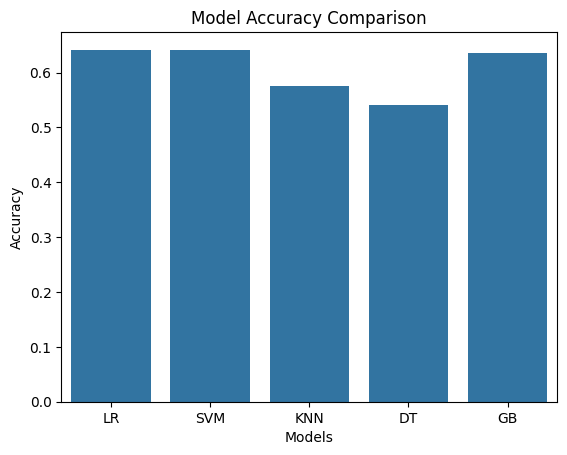

In [124]:
sns.barplot(x='Models', y='ACC', data=final_data)

# Add labels and title for clarity
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()